In [3]:
import os

import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [4]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [5]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_data.LotFrontage.fillna(0, inplace=True)
train_data.MasVnrArea.fillna(0, inplace=True)

test_data.LotFrontage.fillna(0, inplace=True)
test_data.MasVnrArea.fillna(0, inplace=True)
test_data.BsmtFinSF1.fillna(0,inplace=True)
test_data.TotalBsmtSF.fillna(0,inplace=True)
test_data.GarageCars.fillna(0,inplace=True)
test_data.GarageArea.fillna(0,inplace=True)
test_data.BsmtUnfSF.fillna(0,inplace=True)
test_data.BsmtFullBath.fillna(0,inplace=True)

In [7]:
gas = ['NoSeWa',"NoSewr","AllPub"]
water = ["NoSewr","AllPub"]
swer = ["AllPub"]
train_data["Gas"] = train_data.Utilities.isin(gas)*1
train_data["Water"] = train_data.Utilities.isin(water)*1
train_data["Sewr"] = train_data.Utilities.isin(swer)*1
train_data.drop(["Utilities"], axis=1, inplace=True)

test_data["Gas"] = test_data.Utilities.isin(gas)*1
test_data["Water"] = test_data.Utilities.isin(water)*1
test_data["Sewr"] = test_data.Utilities.isin(swer)*1
test_data.drop(["Utilities"], axis=1, inplace=True)

In [8]:
train_data.drop(["GarageYrBlt","Gas"],axis=1,inplace=True)
train_data.dropna(subset=['Electrical'])

test_data.drop(["GarageYrBlt","Gas"],axis=1,inplace=True)
test_data.dropna(subset=['Electrical'])

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Water,Sewr
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,Inside,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,1,1
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,Corner,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,1,1
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,Inside,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,1,1
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,Inside,...,NaN,NaN,NaN,0,6,2010,WD,Normal,1,1
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,Inside,...,NaN,NaN,NaN,0,1,2010,WD,Normal,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,Inside,...,NaN,NaN,NaN,0,6,2006,WD,Normal,1,1
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,Inside,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,1,1
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,Inside,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,1,1
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,Inside,...,NaN,MnPrv,Shed,700,7,2006,WD,Normal,1,1


In [9]:
train_data.CentralAir = train_data.CentralAir.isin(['Y'])*1
test_data.CentralAir = test_data.CentralAir.isin(['Y'])*1

In [10]:
dummies = ["MSSubClass","MSZoning","Street","LotShape",
"LandContour","LotConfig","LandSlope","Neighborhood",
"Condition1","Condition2","BldgType","HouseStyle","RoofStyle",
"RoofMatl","Exterior1st","Exterior2nd","Foundation","Heating",
"Electrical","Functional","PavedDrive","SaleType","SaleCondition",
"ExterQual","ExterCond","HeatingQC","KitchenQual"]

dummies_na = ["Alley","MasVnrType","GarageType","GarageFinish",
"MiscFeature","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1",
"BsmtFinType2","FireplaceQu","GarageQual","GarageCond","PoolQC","Fence"]

train_data = pd.get_dummies(train_data, columns=dummies, prefix=dummies, drop_first=True)
train_data = pd.get_dummies(train_data, columns=dummies_na, prefix=dummies_na, drop_first=True, dummy_na=True)

test_data = pd.get_dummies(test_data, columns=dummies, prefix=dummies, drop_first=True)
test_data = pd.get_dummies(test_data, columns=dummies_na, prefix=dummies_na, drop_first=True, dummy_na=True)


In [11]:
train_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 275 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    Id                     int64  
 1    LotFrontage            float64
 2    LotArea                int64  
 3    OverallQual            int64  
 4    OverallCond            int64  
 5    YearBuilt              int64  
 6    YearRemodAdd           int64  
 7    MasVnrArea             float64
 8    BsmtFinSF1             int64  
 9    BsmtFinSF2             int64  
 10   BsmtUnfSF              int64  
 11   TotalBsmtSF            int64  
 12   CentralAir             int32  
 13   1stFlrSF               int64  
 14   2ndFlrSF               int64  
 15   LowQualFinSF           int64  
 16   GrLivArea              int64  
 17   BsmtFullBath           int64  
 18   BsmtHalfBath           int64  
 19   FullBath               int64  
 20   HalfBath               int64  
 21   BedroomAbvGr           int64  
 22 

In [12]:
sale_price_corr = train_data.corr().SalePrice
toDrop = sale_price_corr.where(sale_price_corr.abs() < 0.25).dropna().keys()

In [13]:
toDrop

Index(['Id', 'LotFrontage', 'OverallCond', 'BsmtFinSF2', 'BsmtUnfSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'BedroomAbvGr',
       'KitchenAbvGr',
       ...
       'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_nan', 'PoolQC_Fa',
       'PoolQC_Gd', 'PoolQC_nan', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw',
       'Fence_nan'],
      dtype='object', length=227)

In [14]:
training = train_data.drop(toDrop,axis=1)
testing = test_data.drop(toDrop,axis=1,errors='ignore')
testing.drop(['MSSubClass_150'],axis=1,inplace=True)

In [15]:
testing.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotArea                1459 non-null   int64  
 1   OverallQual            1459 non-null   int64  
 2   YearBuilt              1459 non-null   int64  
 3   YearRemodAdd           1459 non-null   int64  
 4   MasVnrArea             1459 non-null   float64
 5   BsmtFinSF1             1459 non-null   float64
 6   TotalBsmtSF            1459 non-null   float64
 7   CentralAir             1459 non-null   int32  
 8   1stFlrSF               1459 non-null   int64  
 9   2ndFlrSF               1459 non-null   int64  
 10  GrLivArea              1459 non-null   int64  
 11  FullBath               1459 non-null   int64  
 12  HalfBath               1459 non-null   int64  
 13  TotRmsAbvGrd           1459 non-null   int64  
 14  Fireplaces             1459 non-null   int64  
 15  Gara

In [16]:
#plt.figure(figsize=(30, 20))
#sns.heatmap(training.corr(),annot=True,cmap='YlGnBu')

In [17]:
X_data = training.drop(["SalePrice"],axis=1)
y_data = training["SalePrice"]

scaler = preprocessing.StandardScaler().fit(X_data)
X_scaled = scaler.transform(X_data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_data, test_size=0.2)


X_test_data_scaled = scaler.transform(testing)

In [19]:
X_train.shape[1]

47

In [20]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input((X_train.shape[1],)))                             #input  layer                                          
model.add(
    tf.keras.layers.Dense(
        16,
        activation=tf.keras.layers.LeakyReLU(),
        kernel_regularizer=tf.keras.regularizers.L1L2(0.1)
    )
)
model.add(
    tf.keras.layers.Dense(
        16,
        activation=tf.keras.layers.LeakyReLU(),
        kernel_regularizer=tf.keras.regularizers.L1L2(0.1)
    )
)
model.add(tf.keras.layers.Dense(1,activation='linear'))


model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=10**-2), loss='mse',metrics=['mae','mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                768       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________


In [21]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10, min_lr=10**-5,min_delta=10**7)

callbacks = [early_stop,reduce_lr]

In [22]:
hist = model.fit(X_train,y_train,validation_split=0.3,epochs=100000,callbacks=callbacks,verbose=1)

Epoch 1/100000
26/26 [==============================] - 1s 6ms/step - loss: 38994624512.0000 - mae: 180286.0781 - mse: 38994624512.0000 - val_loss: 38302060544.0000 - val_mae: 180866.4844 - val_mse: 38302060544.0000 - lr: 0.0100
Epoch 2/100000
26/26 [==============================] - 0s 3ms/step - loss: 38946385920.0000 - mae: 180203.6562 - mse: 38946385920.0000 - val_loss: 38180831232.0000 - val_mae: 180650.9375 - val_mse: 38180831232.0000 - lr: 0.0100
Epoch 3/100000
26/26 [==============================] - 0s 2ms/step - loss: 38696906752.0000 - mae: 179772.2188 - mse: 38696906752.0000 - val_loss: 37689257984.0000 - val_mae: 179769.8594 - val_mse: 37689257984.0000 - lr: 0.0100
Epoch 4/100000
26/26 [==============================] - 0s 2ms/step - loss: 37883052032.0000 - mae: 178372.3750 - mse: 37883052032.0000 - val_loss: 36483063808.0000 - val_mae: 177552.2812 - val_mse: 36483063808.0000 - lr: 0.0100
Epoch 5/100000
26/26 [==============================] - 0s 3ms/step - loss: 36222128

In [23]:
model.evaluate(X_test,y_test)

10/10 [==============================] - 0s 1ms/step - loss: 748751296.0000 - mae: 19031.8418 - mse: 748750976.0000


[748751296.0, 19031.841796875, 748750976.0]

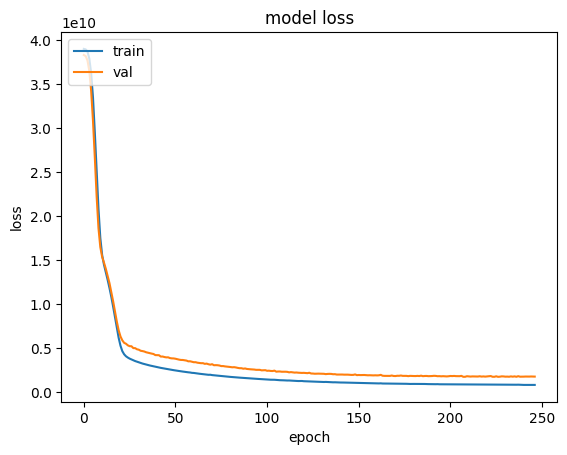

In [24]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [25]:
res = model.predict(X_test_data_scaled)

46/46 [==============================] - 0s 622us/step


In [26]:
X_test_data_scaled[660]

array([-0.45869901, -1.51846683, -0.8368886 , -1.6893685 , -0.57075013,
       -0.97301818, -2.41116693,  0.26381257, -0.68992894, -0.79516323,
       -1.17925611, -1.02604084, -0.76162067, -1.5495763 , -0.95122649,
       -1.02685765, -0.90290874, -0.75217584, -0.70448325, -0.50748065,
        2.3868908 , -1.31490378, -0.16998114, -0.23595776, -0.73822324,
       -0.72608309, -0.87610187,  1.12096779, -0.3019617 , -0.30599503,
       -0.70856024,  0.78197125,  1.55280873, -0.81882877,  0.99317398,
        0.83055091, -0.3099937 , -1.21432132,  1.66511556,  1.18879062,
       -0.89456504, -0.31789276, -1.37101583, -0.63336532, -0.59317101,
        1.05638157,  0.31789276])

In [27]:
d = {'Id': test_data["Id"], 'SalePrice':res[:,0]}
df= pd.DataFrame(data=d,index=None)

In [28]:
df.to_csv("results.csv",index=False)